### Importing libraries

In [3]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns

### Importing data

In [4]:
file_path = 'sales_data'
file_name = 'Sales_August_2019.csv'

In [5]:
full_path = f'{file_path}{file_name}'
print(full_path)

sales_dataSales_August_2019.csv


In [6]:
pd.read_csv('sales_data\Sales_April_2019.csv')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
18378,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001"
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"


In [7]:
os.listdir(file_path)

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [8]:
final_df = pd.DataFrame()
for file_name in os.listdir(file_path):
    full_path = os.path.join(file_path, file_name)
    df = pd.read_csv(full_path)
    final_df = pd.concat([final_df,df])
    print(file_name, df.shape,final_df.shape)

Sales_April_2019.csv (18383, 6) (18383, 6)
Sales_August_2019.csv (12011, 6) (30394, 6)
Sales_December_2019.csv (25117, 6) (55511, 6)
Sales_February_2019.csv (12036, 6) (67547, 6)
Sales_January_2019.csv (9723, 6) (77270, 6)
Sales_July_2019.csv (14371, 6) (91641, 6)
Sales_June_2019.csv (13622, 6) (105263, 6)
Sales_March_2019.csv (15226, 6) (120489, 6)
Sales_May_2019.csv (16635, 6) (137124, 6)
Sales_November_2019.csv (17661, 6) (154785, 6)
Sales_October_2019.csv (20379, 6) (175164, 6)
Sales_September_2019.csv (11686, 6) (186850, 6)


### Checking for null values and empty rows

In [9]:
# check for all the null values in final_df dataframe
final_df.isna().sum(axis = 0)

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [10]:
final_df.loc[(final_df['Order ID'].isna()),:]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
final_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [12]:
# finding rows where all the columns have null value
final_df.loc[(final_df.isna().sum(axis = 1) == len(final_df.columns))]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
final_df = final_df.loc[(final_df.isna().sum(axis =1) != len(final_df.columns))]

### Updating column names for uniformity

In [14]:
# change all column names to lower case and replace space with _
final_df.columns = final_df.columns.str.lower().str.replace(' ','_')

In [15]:
final_df.dtypes

order_id            object
product             object
quantity_ordered    object
price_each          object
order_date          object
purchase_address    object
dtype: object

### Chnaging numeric column data types

In [16]:
final_df['price_each'].astype(float)

ValueError: could not convert string to float: 'Price Each'

In [17]:
final_df_price_each = final_df.loc[(final_df['price_each'] == 'Price Each'),:]
final_df_price_each

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [18]:
final_df = final_df.loc[(final_df['price_each'] != 'Price Each'),:]
final_df

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [19]:
final_df['price_each'] = final_df['price_each'].astype(float)

In [20]:
final_df['quantity_ordered'] = final_df['quantity_ordered'].astype(float)
final_df.dtypes

order_id             object
product              object
quantity_ordered    float64
price_each          float64
order_date           object
purchase_address     object
dtype: object

### Finding total sales and visualization

In [21]:
final_df['bill_amount'] = final_df['quantity_ordered'] * final_df['price_each']

In [22]:
final_df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,bill_amount
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99


In [23]:
final_df['state_name']=\
final_df['purchase_address'].apply(lambda address: address.split()[-2].strip())

In [24]:
final_df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,bill_amount,state_name
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,TX
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,MA
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,CA
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,CA
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,CA


In [25]:
# total yearly sales by state
yearly_sales = \
final_df.groupby(['state_name'])['bill_amount'].sum().sort_values(ascending = False)

In [26]:
yearly_sales.head

<bound method NDFrame.head of state_name
CA    13714774.71
NY     4664317.43
TX     4587557.15
MA     3661642.01
GA     2795498.58
WA     2747755.48
OR     1870732.34
ME      449758.27
Name: bill_amount, dtype: float64>

In [27]:
yearly_sales.index

Index(['CA', 'NY', 'TX', 'MA', 'GA', 'WA', 'OR', 'ME'], dtype='object', name='state_name')

In [28]:
yearly_sales_df = yearly_sales.reset_index()

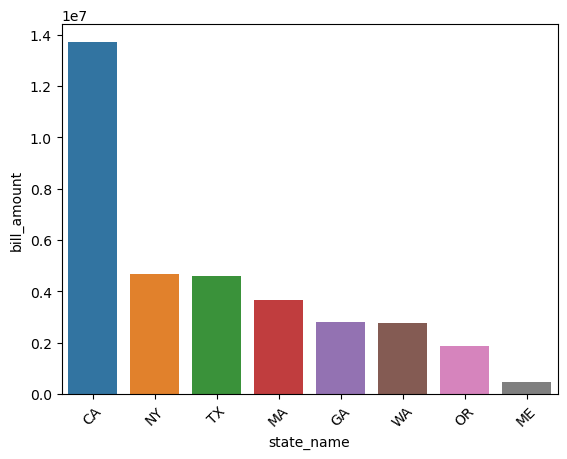

In [29]:
sns.barplot(y = 'bill_amount', x = 'state_name', data = yearly_sales_df);
plt.xticks(rotation = 45);

In [30]:
# total sales by city
final_df['city_name']=\
final_df['purchase_address'].apply(lambda address: address.split(',')[1].strip())
sales_city = \
final_df.groupby(['city_name', 'state_name'])['bill_amount'].sum().sort_values(ascending = False)

In [31]:
sales_city_df = sales_city.reset_index()
sales_city_df['city_state'] = sales_city_df['city_name']+ ', ' + sales_city_df['state_name']
sales_city_df

,city_name,state_name,bill_amount,city_state
0,San Francisco,CA,8262203.91,"San Francisco, CA"
1,Los Angeles,CA,5452570.80,"Los Angeles, CA"
2,New York City,NY,4664317.43,"New York City, NY"
3,Boston,MA,3661642.01,"Boston, MA"
4,Atlanta,GA,2795498.58,"Atlanta, GA"
5,Dallas,TX,2767975.40,"Dallas, TX"
6,Seattle,WA,2747755.48,"Seattle, WA"
7,Portland,OR,1870732.34,"Portland, OR"
8,Austin,TX,1819581.75,"Austin, TX"
9,Portland,ME,449758.27,"Portland, ME"


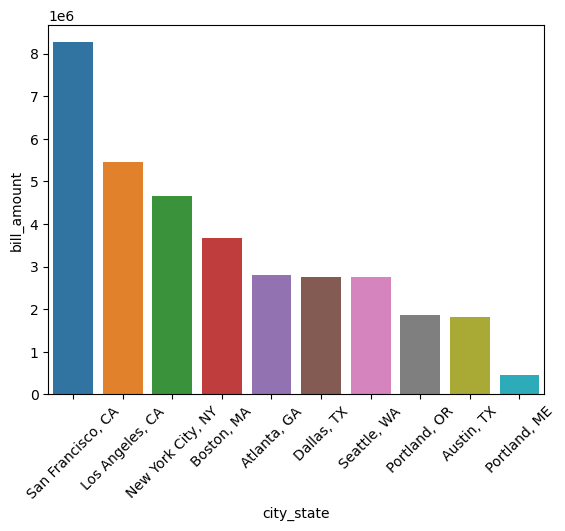

In [32]:
sns.barplot(x = 'city_state', y = 'bill_amount', data = sales_city_df)
plt.xticks(rotation = 45);

In [33]:
final_df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,bill_amount,state_name,city_name
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,TX,Dallas
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,MA,Boston
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,CA,Los Angeles
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,CA,Los Angeles
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,CA,Los Angeles


In [34]:
final_df['order_date'] = pd.to_datetime(final_df['order_date'], format = '%m/%d/%y %H:%M')

In [35]:
order_by_time = \
final_df.groupby(final_df['order_date'].dt.hour)['bill_amount'].sum()
order_by_hour = order_by_time.reset_index()
order_by_hour = order_by_hour.rename(columns={'order_date': 'order_hour'})

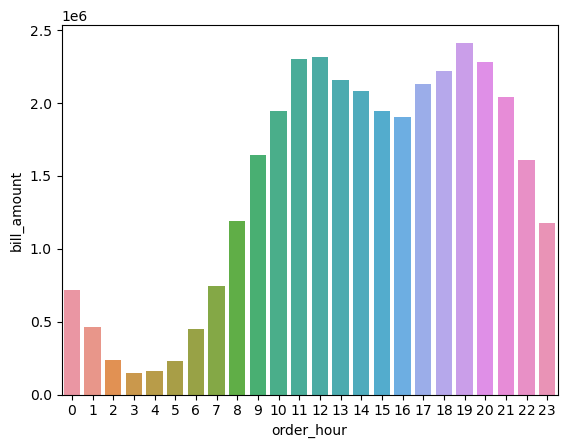

In [36]:
sns.barplot(x = 'order_hour',y = 'bill_amount', data = order_by_hour);